In [1]:
import pandas as pd
import os
import plotly.express as px
import numpy as np

In [2]:
tasks = ['fillmask','image_class', 'itt', 'obj_detect', 'qa', 'zeroshot_qa',
         'zeroshot_summarize', 'summarize', 'text_class', 
         'zeroshot_sentiment', 'textgen', 'token_class','tti']
len(tasks)

13

In [3]:
model_param_df = pd.read_csv('../model_parameters.csv', header=0)
model_param_df.head()

model_name  num_parameters
0                      ainize/kobart-news       123859968
1                          albert-base-v2        11683584
2        alvaroalon2/biobert_diseases_ner       108310272
3  Babelscape/wikineural-multilingual-ner       177853440
4                         bert-base-cased       108310272

In [4]:
model_performance_df = pd.read_csv('../eval/performance.csv', header=0)
model_performance_df.head()

model           task     type  sst2 (acc)  imdb (acc)  \
0  bigscience/bloomz-560m      sentiment  decoder      0.9243      0.9409   
1  bigscience/bloomz-560m  summarization  decoder         NaN         NaN   
2  bigscience/bloomz-560m             qa  decoder         NaN         NaN   
3   bigscience/bloomz-1b7      sentiment  decoder      0.9438      0.9724   
4   bigscience/bloomz-1b7  summarization  decoder         NaN         NaN   

   tomatoes (acc)  sciq (acc)  squad (f1)  squad_v2 (f1, has answer)  \
0          0.8480         NaN         NaN                        NaN   
1             NaN         NaN         NaN                        NaN   
2             NaN       0.918      0.4269                      0.209   
3          0.9296         NaN         NaN                        NaN   
4             NaN         NaN         NaN                        NaN   

   samsum (rouge)  xsum (rouge)  cnn (rouge)  
0             NaN           NaN          NaN  
1          0.2253        0.1463       0.1017  
2             NaN           NaN          NaN  
3             NaN           NaN          NaN  
4          0.2570        0.1553       0.1803

In [11]:
datadir = '../emissions_sept20/complete'

In [6]:
def find_run_info(run_id):
    run_csv = pd.read_csv('../emissions_sept20/base/emissions_base_'+run_id+'.csv')
    #print(run_csv.head())
    query_emissions = run_csv[run_csv['task_name'] == 'query model']['emissions']
    return query_emissions*1000

In [7]:
def find_run_energy(run_id):
    run_csv = pd.read_csv('../emissions_sept20/base/emissions_base_'+run_id+'.csv')
    #print(run_csv.head())
    query_energy = run_csv[run_csv['task_name'] == 'query model']['energy_consumed']
    return query_energy.values[0]

In [8]:
def find_load_info(run_id):
    run_csv = pd.read_csv('../emissions_sept20/base/emissions_base_'+run_id+'.csv')
    #print(run_csv.head())
    load_emissions = run_csv[run_csv['task_name'] == 'load model']['emissions']
    return load_emissions*1000

def find_model_info(model_name):
    info = hf_api.model_info(model_name)
    return info.lastModified

In [9]:
def get_model_params(mname):
    try:
        m_params = model_param_df['num_parameters'][model_param_df['model_name']==mname].values[0]
    except: 
        print('missing '+mname)
        m_params=0
    return m_params

## Fill mask

In [12]:
for t in tasks[:1]:
    fill_data = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
    print(fill_data)

['../emissions_sept20/complete/fillmask_bookcorpus.csv', '../emissions_sept20/complete/fillmask_c4.csv', '../emissions_sept20/complete/fillmask_oscar.csv']


In [13]:
dflist=[]
for c in fill_data:
    fillmaskdf =pd.read_csv(c)
    fillmaskdf['dataset'] = os.path.basename(c.replace('.csv','').split('_')[2])
    fillmaskdf['emissions'] = fillmaskdf['emissions']*1000
    fillmaskdf['task'] = 'fill_mask'
    fillmaskdf['query emissions (g)'] = fillmaskdf['run_id'].apply(lambda x : find_run_info(x))
    fillmaskdf= fillmaskdf.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(fillmaskdf)


fillmask = pd.concat(dflist, axis=0)
fillmask.shape

(240, 34)

# Image Classification

In [14]:
for t in tasks[1:2]:
    print(t)
    image_class = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t) and 'resize'in f]
    print(image_class)

image_class
['../emissions_sept20/complete/image_class_imagenet_resized.csv', '../emissions_sept20/complete/image_class_cifar100_resized.csv', '../emissions_sept20/complete/image_class_cifar10_resized.csv']


In [15]:
dflist=[]
for c in image_class:
    image_class_f =pd.read_csv(c)
    image_class_f['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    image_class_f['emissions'] =image_class_f['emissions']*1000
    image_class_f['task'] = 'image_classification'
    image_class_f['query emissions (g)'] = image_class_f['run_id'].apply(lambda x : find_run_info(x))
    image_class_f['load emissions (g)'] = image_class_f['run_id'].apply(lambda x : find_load_info(x))
    image_class_f= image_class_f.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(image_class_f)

image_class = pd.concat(dflist, axis=0)
image_class.shape

(240, 35)

# ITT

In [16]:
for t in tasks[2:3]:
    print(t)
    itt = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t) and 'resized' in f]
    print(itt)

itt
['../emissions_sept20/complete/itt_visualgenome_resized.csv', '../emissions_sept20/complete/itt_redcaps_resized.csv', '../emissions_sept20/complete/itt_coco_resized.csv']


In [17]:
dflist=[]
for c in itt:
    itt_df =pd.read_csv(c)
    itt_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[2])
    itt_df['emissions'] = itt_df['emissions']*1000
    itt_df['task'] = 'image_captioning'
    itt_df['query emissions (g)'] = itt_df['run_id'].apply(lambda x : find_run_info(x))
    itt_df= itt_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(itt_df)

itt = pd.concat(dflist, axis=0)
itt.shape

(240, 34)

# Object Detection (Resized)

In [18]:
for t in tasks[3:4]:
    obj_detect = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t) and 'resized' in f]
    print(obj_detect)

['../emissions_sept20/complete/obj_detection_CPPE_resized.csv', '../emissions_sept20/complete/obj_detection_visualgenome_resized.csv', '../emissions_sept20/complete/obj_detection_coco_resized.csv']


In [19]:
dflist=[]
for c in obj_detect:
    obj_df =pd.read_csv(c)
    obj_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    obj_df['emissions'] = obj_df['emissions']*1000
    obj_df['task'] = 'object_detection'
    obj_df['query emissions (g)'] = obj_df['run_id'].apply(lambda x : find_run_info(x))
    obj_df= obj_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(obj_df)

obj_detect = pd.concat(dflist, axis=0)
obj_detect.shape

(240, 34)

# QA

In [20]:
for t in tasks[4:5]:
    print(t)
    qa = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
    print(qa)

qa
['../emissions_sept20/complete/qa_squadv2.csv', '../emissions_sept20/complete/qa_squad.csv', '../emissions_sept20/complete/qa_sciq.csv']


In [21]:
dflist=[]
for c in qa:
    qa_df =pd.read_csv(c)
    qa_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[2])
    qa_df['emissions'] = qa_df['emissions']*1000
    qa_df['task'] = 'question_answering'
    qa_df['query emissions (g)'] = qa_df['run_id'].apply(lambda x : find_run_info(x))
    qa_df= qa_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    qa_df = qa_df[~qa_df.model.isin(['Rakib/roberta-base-on-cuad'])]
    dflist.append(qa_df)

qa = pd.concat(dflist, axis=0)
qa.shape

(240, 34)

### Zero shot QA

In [22]:
t = 'zeroshot_qa'
print(t)
zero_qa = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(zero_qa)

zeroshot_qa
['../emissions_sept20/complete/zeroshot_qa_squad.csv', '../emissions_sept20/complete/zeroshot_qa_squad2.csv', '../emissions_sept20/complete/zeroshot_qa_sciq.csv', '../emissions_sept20/complete/zeroshot_qa_squad_bloomz.csv', '../emissions_sept20/complete/zeroshot_qa_squad2_bloomz.csv', '../emissions_sept20/complete/zeroshot_qa_sciq_bloomz.csv']


In [23]:
dflist=[]
for c in zero_qa:
    zero_qa_df =pd.read_csv(c)
    zero_qa_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    zero_qa_df['emissions'] = zero_qa_df['emissions']*1000
    zero_qa_df['task'] = 'zeroshot_question_answering'
    zero_qa_df['query emissions (g)'] = zero_qa_df['run_id'].apply(lambda x : find_run_info(x))
    zero_qa_df= zero_qa_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    zero_qa_df['dataset'] = zero_qa_df['dataset'].replace('squad2', 'squadv2')
    zero_qa_df = zero_qa_df[~zero_qa_df.model.isin(['bigscience/bloom-560m', 'meta-llama/Llama-2-7b-hf', 'facebook/opt-1.3b','gpt2'])]
    dflist.append(zero_qa_df)

zero_qa = pd.concat(dflist, axis=0)
zero_qa.shape

(240, 34)

# Summarization

In [24]:
t= 'summarize'
print(t)
summ = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t) and '15' in f]
print(summ)

summarize
['../emissions_sept20/complete/summarize_xsum_15.csv', '../emissions_sept20/complete/summarize_samsum_15.csv', '../emissions_sept20/complete/summarize_cnn_15.csv']


In [25]:
dflist=[]
for c in summ:
    summ_df =pd.read_csv(c)
    summ_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[2])
    summ_df['filename'] = c.split('/')[-1]
    summ_df['emissions'] = summ_df['emissions']*1000
    summ_df['task'] = 'summarization'
    summ_df['query emissions (g)'] = summ_df['run_id'].apply(lambda x : find_run_info(x))
    summ_df= summ_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(summ_df)

summ = pd.concat(dflist, axis=0)
summ.shape

(240, 35)

### Zero shot summarization

In [26]:
t = 'zeroshot_summarize'
print(t)
summ_list = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(summ_list)

zeroshot_summarize
['../emissions_sept20/complete/zeroshot_summarize_cnn.csv', '../emissions_sept20/complete/zeroshot_summarize_samsum.csv', '../emissions_sept20/complete/zeroshot_summarize_cnn_bloomz.csv', '../emissions_sept20/complete/zeroshot_summarize_samsum_bloomz.csv', '../emissions_sept20/complete/zeroshot_summarize_xsum_bloomz.csv', '../emissions_sept20/complete/zeroshot_summarize_xsum.csv']


In [27]:
dflist=[]
for c in summ_list:
    zero_summ_df =pd.read_csv(c)
    zero_summ_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    zero_summ_df['filename'] = c.split('/')[-1]
    zero_summ_df['emissions'] = zero_summ_df['emissions']*1000
    zero_summ_df['task'] = 'zeroshot_summarization'
    zero_summ_df['query emissions (g)'] = zero_summ_df['run_id'].apply(lambda x : find_run_info(x))
    zero_summ_df= zero_summ_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    zero_summ_df = zero_summ_df[~zero_summ_df.model.isin(['bigscience/bloom-560m', 'meta-llama/Llama-2-7b-hf', 'facebook/opt-1.3b','gpt2'])]
    dflist.append(zero_summ_df)

zero_summ = pd.concat(dflist, axis=0)
zero_summ.shape

(240, 35)

# Text Classification (Sentiment Analysis)

In [28]:
t = 'text_class'
print(t)
text_class = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(text_class)

text_class
['../emissions_sept20/complete/text_classif_tomatoes.csv', '../emissions_sept20/complete/text_classif_imdb.csv', '../emissions_sept20/complete/text_classif_sst2.csv']


In [29]:
dflist=[]
for c in text_class:
    text_class_df =pd.read_csv(c)
    text_class_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    text_class_df['emissions'] = text_class_df['emissions']*1000
    text_class_df['task'] = 'text_classification'
    text_class_df['query emissions (g)'] = text_class_df['run_id'].apply(lambda x : find_run_info(x))
    text_class_df= text_class_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(text_class_df)

text_class = pd.concat(dflist, axis=0)
text_class.shape

(240, 34)

## Zero shot sentiment analysis

In [30]:
t = 'zeroshot_sentiment'
print(t)
sent_list = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(sent_list)

zeroshot_sentiment
['../emissions_sept20/complete/zeroshot_sentiment_imdb_bloomz.csv', '../emissions_sept20/complete/zeroshot_sentiment_tomatoes_bloomz.csv', '../emissions_sept20/complete/zeroshot_sentiment_imdb.csv', '../emissions_sept20/complete/zeroshot_sentiment_tomatoes.csv', '../emissions_sept20/complete/zeroshot_sentiment_sst2.csv', '../emissions_sept20/complete/zeroshot_sentiment_sst2_bloomz.csv']


In [31]:
dflist=[]
for c in sent_list:
    zero_sent_df =pd.read_csv(c)
    zero_sent_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    zero_sent_df['filename'] = c.split('/')[-1]
    zero_sent_df['emissions'] = zero_sent_df['emissions']*1000
    zero_sent_df['task'] = 'zeroshot_sentiment_analysis'
    zero_sent_df['query emissions (g)'] = zero_sent_df['run_id'].apply(lambda x : find_run_info(x))
    zero_sent_df= zero_sent_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    zero_sent_df = zero_sent_df[~zero_sent_df.model.isin(['bigscience/bloom-560m', 'meta-llama/Llama-2-7b-hf', 'facebook/opt-1.3b','gpt2'])]
    dflist.append(zero_sent_df)

zero_sent = pd.concat(dflist, axis=0)
zero_sent.shape

(240, 35)

In [32]:
all_sent = pd.concat([text_class, zero_sent], axis = 0)
all_sent.shape

(480, 35)

# Text Generation

In [33]:
t= 'textgen'
textgen = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(textgen)

['../emissions_sept20/complete/textgen_wikitext.csv', '../emissions_sept20/complete/textgen_bookcorpus.csv', '../emissions_sept20/complete/textgen_oscar.csv']


In [34]:
dflist=[]
for c in textgen:
    textgen_df =pd.read_csv(c)
    textgen_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[2])
    textgen_df['emissions'] = textgen_df['emissions']*1000
    textgen_df['task'] = 'text_generation'
    textgen_df['query emissions (g)'] = textgen_df['run_id'].apply(lambda x : find_run_info(x))
    textgen_df= textgen_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    textgen_df['num_params'] = textgen_df['model'].apply(lambda x : get_model_params(x))
    dflist.append(textgen_df)

textgen = pd.concat(dflist, axis=0)
textgen.shape

(240, 35)

# Token Classification

In [35]:
t= 'token_class'
token_class = [datadir+'/'+f for f in os.listdir(datadir) if f.startswith(t)]
print(token_class)

['../emissions_sept20/complete/token_classif_record.csv', '../emissions_sept20/complete/token_classif_wikiann.csv', '../emissions_sept20/complete/token_classif_conll2003.csv']


In [36]:
dflist=[]
for c in token_class:
    token_class_df =pd.read_csv(c)
    token_class_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[3])
    token_class_df['emissions'] = token_class_df['emissions']*1000
    token_class_df['task'] = 'token_classification'
    token_class_df['query emissions (g)'] = token_class_df['run_id'].apply(lambda x : find_run_info(x))
    token_class_df= token_class_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    dflist.append(token_class_df)

token_class = pd.concat(dflist, axis=0)
token_class.shape

(240, 34)

# Text to Image

In [37]:
t = 'tti'
print(t)
tti_class = [f for f in os.listdir(datadir) if f.startswith(t)]
print(tti_class)

tti
['tti_diffusiondb.csv', 'tti_imagereward.csv', 'tti_sd_prompts.csv']


In [38]:
dflist=[]
for c in tti_class:
    tti_class_df =pd.read_csv(datadir +'/'+c)
    tti_class_df['dataset'] = os.path.basename(c.replace('.csv','').split('_')[1])
    tti_class_df['emissions'] = tti_class_df['emissions']
    tti_class_df['query_energy (kWh)'] = tti_class_df['run_id'].apply(lambda x : find_run_energy(x))
    tti_class_df['dataset'] = tti_class_df['dataset'].replace('sd', 'sd_prompts')
    tti_class_df['task'] = 'image generation'
    tti_class_df['query emissions (g)'] = tti_class_df['run_id'].apply(lambda x : find_run_info(x))
    tti_class_df= tti_class_df.rename({'project_name':'model', 'emissions': 'total emissions (g)'},axis=1)
    tti_class_df['num_params'] = tti_class_df['model'].apply(lambda x : get_model_params(x))
    tti_class_df = tti_class_df[~tti_class_df['model'].str.startswith('SG16122')]
    tti_class_df = tti_class_df[~tti_class_df['model'].str.startswith('stabilityai/stable-diffusion-2-1-base')]
    dflist.append(tti_class_df)

    
tti_class = pd.concat(dflist, axis=0)
tti_class.shape

(240, 36)

# Finetuned vs Zeroshot : 3 tasks

In [39]:
fine_zero_df = pd.concat([qa,summ, text_class, zero_qa, zero_summ, zero_sent], axis=0)
fine_zero_df.shape

(1440, 35)

In [40]:
seq2seq_finetuned = ['sshleifer/distilbart-xsum-12-6', 'sshleifer/distilbart-cnn-12-6', 'sshleifer/distilbart-cnn-6-6',
                     'pszemraj/led-large-book-summary', 'google/pegasus-xsum', 'google/pegasus-large',
                     'google/pegasus-multi_news' ,'facebook/bart-large-cnn', 'ainize/bart-base-cnn']

In [41]:
def encoder_check(mname):
    if 'flan' in mname:
        return 'zeroshot_seq2seq'
    elif mname in seq2seq_finetuned:
        return 'finetuned_seq2seq'
    elif 'bloomz' in mname:
        return 'zeroshot_decoder'
    else:   
        return 'finetuned_encoder'

In [42]:
fine_zero_df['architecture_type'] = fine_zero_df.apply(lambda x : encoder_check(x.model),axis=1)
fine_zero_df['architecture_type'].value_counts()

finetuned_encoder    480
zeroshot_seq2seq     360
zeroshot_decoder     360
finetuned_seq2seq    240
Name: architecture_type, dtype: int64

In [43]:
fine_zero_df['num_params'] = fine_zero_df['model'].apply(lambda x : get_model_params(x))


In [44]:
fine_data_df = fine_zero_df.groupby(['model','dataset','task']).mean()
fine_data_df = fine_data_df.reset_index()  
fine_data_df['architecture_type'] = fine_data_df.apply(lambda x : encoder_check(x.model),axis=1)
fine_data_df['dataset']=fine_data_df['dataset'].str.replace('tomatoes','rotten_tomatoes')
fine_data_df.head()

/tmp/ipykernel_48887/4271790856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fine_data_df = fine_zero_df.groupby(['model','dataset','task']).mean()


model dataset                 task  \
0  MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli    imdb  text_classification   
1              SamLowe/roberta-base-go_emotions    imdb  text_classification   
2                          ainize/bart-base-cnn     cnn        summarization   
3                          ainize/bart-base-cnn  samsum        summarization   
4                          ainize/bart-base-cnn    xsum        summarization   

     duration  total emissions (g)  emissions_rate  cpu_power   gpu_power  \
0   17.531775             1.075776        0.000061       42.5  599.078945   
1    8.676326             0.630453        0.000073       42.5  582.313041   
2  104.887903             3.976329        0.000038       42.5  482.616190   
3  101.712761             3.826435        0.000038       42.5  472.356544   
4  105.729834             4.190977        0.000040       42.5  521.517298   

   ram_power  cpu_energy  ...  cloud_region  cpu_count  gpu_count  longitude  \
0  430.77675    0.000321  ...           NaN        1.0        8.0  -119.7257   
1  430.77675    0.000191  ...           NaN        1.0        8.0  -119.7257   
2  430.77675    0.001293  ...           NaN        1.0        8.0  -119.7257   
3  430.77675    0.001259  ...           NaN        1.0        8.0  -119.7257   
4  430.77675    0.001306  ...           NaN        1.0        8.0  -119.7257   

   latitude  ram_total_size  pue  query emissions (g)   num_params  \
0   45.8234        1148.738  1.0             0.696514  183831552.0   
1   45.8234        1148.738  1.0             0.335078  124645632.0   
2   45.8234        1148.738  1.0             3.808928  139420416.0   
3   45.8234        1148.738  1.0             3.647912  139420416.0   
4   45.8234        1148.738  1.0             4.003528  139420416.0   

   architecture_type  
0  finetuned_encoder  
1  finetuned_encoder  
2  finetuned_seq2seq  
3  finetuned_seq2seq  
4  finetuned_seq2seq  

[5 rows x 24 columns]

### Diff for QA

In [45]:
fine_data_df[fine_data_df['model'] == 'deepset/bert-large-uncased-whole-word-masking-squad2']['query emissions (g)'].mean()

0.7012381680969201

In [46]:
fine_data_df[(fine_data_df['model'] == 'google/flan-t5-base') & (fine_data_df['task'] == 'zeroshot_question_answering')]['query emissions (g)'].mean()

2.3627604721551068

In [47]:
fine_data_df[(fine_data_df['model'] == 'bigscience/bloomz-560m') & (fine_data_df['task'] == 'zeroshot_question_answering')]['query emissions (g)'].mean()

2.3464301372978364

### Dif for text classification

In [48]:
fine_data_df[fine_data_df['model'] == 'nlptown/bert-base-multilingual-uncased-sentiment']['query emissions (g)'].mean()

0.32677630459068335

In [49]:
fine_data_df[(fine_data_df['model'] == 'google/flan-t5-xl') & (fine_data_df['task'] == 'zeroshot_sentiment_analysis')]['query emissions (g)'].mean()

2.6635636067988067

In [50]:
fine_data_df[(fine_data_df['model'] == 'bigscience/bloomz-7b1') & (fine_data_df['task'] == 'zeroshot_sentiment_analysis')]['query emissions (g)'].mean()

4.669683122527873

## Fig 4

In [51]:
fine_data_df['log_size'] = np.log(fine_data_df["num_params"])

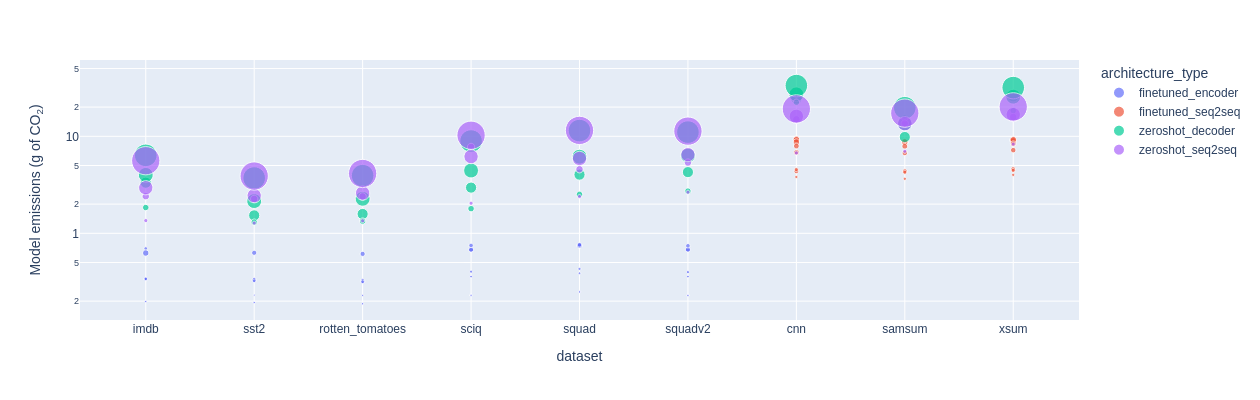

In [52]:
color_discrete_map = {'finetuned_encoder': '#636EFA', 'zeroshot_seq2seq': '#AB63FA', 'zeroshot_decoder': '#00CC96', 'finetuned_seq2seq':'#EF553B'}
fig = px.scatter(fine_data_df, x="dataset", y="query emissions (g)", color="architecture_type", size="num_params",
                 size_max=20, color_discrete_map = color_discrete_map, log_y=True, height=400, width=800, custom_data=['model'])
fig.update_xaxes(categoryorder='array', categoryarray= ['imdb', 'sst2', 'rotten_tomatoes',  'sciq', 'squad', 'squadv2', 'cnn', 'samsum','xsum'])
fig.update_traces(
    hovertemplate="<br>".join([
        "Model: %{customdata[0]}",
    ])
)
fig.update_layout(yaxis_title='Model emissions (g of CO<sub>2</sub>)')
fig.show()

# All together

In [53]:
all_df = pd.concat([fillmask,image_class, itt, qa, zero_qa, summ, zero_summ, obj_detect, 
                    text_class, zero_sent, textgen, token_class, tti_class], axis=0)
all_df= all_df.sort_values('query emissions (g)')
all_df.shape

(3120, 38)

In [54]:
all_df['num_params'] = all_df['model'].apply(lambda x : get_model_params(x))

In [55]:
all_df['query_energy (kWh)'] = all_df['run_id'].apply(lambda x : find_run_energy(x))

In [56]:
text_tasks = ['fill_mask', 'question_answering', 'summarization', 'text_classification','text_generation', 'token_classification']
image_tasks= ['image_classification', 'object_detection']
multimodal = ['image_captioning', 'image generation']

In [57]:
generative = ['summarization', 'text_generation', 'image_captioning','image generation', 
              'zeroshot_summarization','zeroshot_question_answering','zeroshot_sentiment_analysis']

In [58]:
def gen_disc(task):
    if task in generative:
        return "generative"
    else: 
        return "discriminative"

In [59]:
all_df['generative'] = all_df['task'].apply(lambda x : gen_disc(x))
all_df['generative'].value_counts()

generative        1680
discriminative    1440
Name: generative, dtype: int64

In [61]:
all_df.to_csv('co2_data.csv')

In [62]:
grouped_df = all_df.groupby(['model','task']).mean()
grouped_df = grouped_df.reset_index()  
grouped_df['generative'] = grouped_df['task'].apply(lambda x : gen_disc(x))
grouped_df.head()

/tmp/ipykernel_48887/3166891396.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



model                  task  \
0        Babelscape/wikineural-multilingual-ner  token_classification   
1                 CompVis/stable-diffusion-v1-4      image generation   
2                       EleutherAI/gpt-neo-125m       text_generation   
3       Jean-Baptiste/roberta-large-ner-english  token_classification   
4  MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli   text_classification   

      duration  total emissions (g)  emissions_rate  cpu_power   gpu_power  \
0    10.990853             0.496506        0.000045       42.5  505.231037   
1  4072.461915             0.186938        0.000046       42.5  537.421159   
2    88.689967             3.660540        0.000041       42.5  544.576019   
3    19.403016             0.895479        0.000046       42.5  508.947942   
4    17.531775             1.075776        0.000061       42.5  599.078945   

   ram_power  cpu_energy  gpu_energy  ...  gpu_count  longitude  latitude  \
0  430.77675    0.000163    0.001915  ...        8.0  -119.7257   45.8234   
1  430.77675    0.048241    0.810347  ...        8.0  -119.7257   45.8234   
2  430.77675    0.001142    0.013784  ...        8.0  -119.7257   45.8234   
3  430.77675    0.000282    0.003486  ...        8.0  -119.7257   45.8234   
4  430.77675    0.000321    0.004273  ...        8.0  -119.7257   45.8234   

   ram_total_size  pue  query emissions (g)  load emissions (g)    num_params  \
0        1148.738  1.0             0.392791                 NaN  1.778534e+08   
1        1148.738  1.0           186.425127                 NaN  1.370217e+09   
2        1148.738  1.0             3.354097                 NaN  1.251986e+08   
3        1148.738  1.0             0.731566                 NaN  3.553597e+08   
4        1148.738  1.0             0.696514                 NaN  1.838316e+08   

   query_energy (kWh)      generative  
0            0.002831  discriminative  
1            1.343606      generative  
2            0.024174      generative  
3            0.005273  discriminative  
4            0.005020  discriminative  

[5 rows x 25 columns]

In [63]:
model_df = all_df.groupby(['model']).mean()
model_df = model_df.reset_index()  
model_df.head()

/tmp/ipykernel_48887/3177835145.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



model     duration  \
0        Babelscape/wikineural-multilingual-ner    10.990853   
1                 CompVis/stable-diffusion-v1-4  4072.461915   
2                       EleutherAI/gpt-neo-125m    88.689967   
3       Jean-Baptiste/roberta-large-ner-english    19.403016   
4  MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli    17.531775   

   total emissions (g)  emissions_rate  cpu_power   gpu_power  ram_power  \
0             0.496506        0.000045       42.5  505.231037  430.77675   
1             0.186938        0.000046       42.5  537.421159  430.77675   
2             3.660540        0.000041       42.5  544.576019  430.77675   
3             0.895479        0.000046       42.5  508.947942  430.77675   
4             1.075776        0.000061       42.5  599.078945  430.77675   

   cpu_energy  gpu_energy  ram_energy  ...  cpu_count  gpu_count  longitude  \
0    0.000163    0.001915    0.001501  ...        1.0        8.0  -119.7257   
1    0.048241    0.810347    0.488717  ...        1.0        8.0  -119.7257   
2    0.001142    0.013784    0.011455  ...        1.0        8.0  -119.7257   
3    0.000282    0.003486    0.002687  ...        1.0        8.0  -119.7257   
4    0.000321    0.004273    0.003159  ...        1.0        8.0  -119.7257   

   latitude  ram_total_size  pue  query emissions (g)  load emissions (g)  \
0   45.8234        1148.738  1.0             0.392791                 NaN   
1   45.8234        1148.738  1.0           186.425127                 NaN   
2   45.8234        1148.738  1.0             3.354097                 NaN   
3   45.8234        1148.738  1.0             0.731566                 NaN   
4   45.8234        1148.738  1.0             0.696514                 NaN   

     num_params  query_energy (kWh)  
0  1.778534e+08            0.002831  
1  1.370217e+09            1.343606  
2  1.251986e+08            0.024174  
3  3.553597e+08            0.005273  
4  1.838316e+08            0.005020  

[5 rows x 23 columns]

In [64]:
model_df[['model','query emissions (g)']].to_csv('models.csv')
                                                 

### all tasks (supp mat)

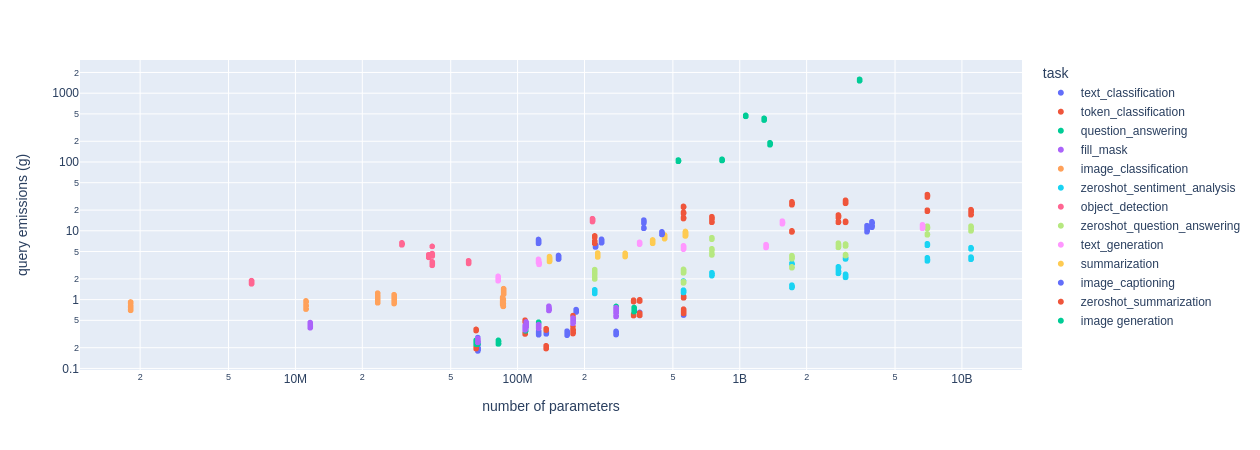

In [65]:
suppmat_df = px.scatter(all_df, x="num_params", y="query emissions (g)", color="task", 
               width=900, height=450, log_y=True, log_x=True)
suppmat_df.update_layout(xaxis={'categoryorder':'mean ascending'})
suppmat_df.update_layout(xaxis_title='number of parameters')

suppmat_df.show()


## Query emissions - finetuned

In [66]:
finetuned_df = all_df[~all_df['task'].str.contains('zero')]
finetuned_df.head()

timestamp                           model  \
68  2023-10-02T20:34:45         lvwerra/distilbert-imdb   
71  2023-10-02T20:35:50  sbcBI/sentiment_analysis_model   
79  2023-10-02T20:38:39  sbcBI/sentiment_analysis_model   
76  2023-10-02T20:37:32         lvwerra/distilbert-imdb   
12  2023-10-02T20:15:12         lvwerra/distilbert-imdb   

                                  run_id  duration  total emissions (g)  \
68  4918aa0a-4f4d-4aa5-b2c8-66d00d1d6d57  5.218185             0.380857   
71  ca0641de-ceaf-4256-9eac-7a1dae6ccad4  5.274528             0.373393   
79  fb3a3f0b-d95b-4f3a-bf1e-8293f251ee0c  5.315402             0.375403   
76  514d9ec0-31d5-4f6b-b55f-d517062514b3  5.273911             0.391798   
12  8a6fb35b-9999-4fdc-8341-443626f74312  5.305716             0.390517   

    emissions_rate  cpu_power   gpu_power  ram_power  cpu_energy  ...  \
68        0.000073       42.5  533.652700  430.77675    0.000125  ...   
71        0.000071       42.5  526.355080  430.77675    0.000122  ...   
79        0.000071       42.5  545.623314  430.77675    0.000123  ...   
76        0.000074       42.5  538.588447  430.77675    0.000128  ...   
12        0.000074       42.5  536.221780  430.77675    0.000128  ...   

    on_cloud  pue   dataset                 task query emissions (g)  \
68         N  1.0  tomatoes  text_classification            0.180670   
71         N  1.0  tomatoes  text_classification            0.182797   
79         N  1.0  tomatoes  text_classification            0.183184   
76         N  1.0  tomatoes  text_classification            0.183329   
12         N  1.0  tomatoes  text_classification            0.183993   

   load emissions (g)  filename  num_params query_energy (kWh)      generative  
68                NaN       NaN    66362880           0.001302  discriminative  
71                NaN       NaN    66362880           0.001317  discriminative  
79                NaN       NaN    66362880           0.001320  discriminative  
76                NaN       NaN    66362880           0.001321  discriminative  
12                NaN       NaN    66362880           0.001326  discriminative  

[5 rows x 39 columns]

In [67]:
finetuned_df[finetuned_df['model'] == 'bert-large-uncased-whole-word-masking-finetuned-squad']['query emissions (g)'].mean()

0.7023925271506198

## Table 2

In [68]:
task = finetuned_df.groupby('task').agg({'query_energy (kWh)': ['mean', 'std']}) 
  
print("Mean, min, and max values of tasks grouped by query energy") 
print(task) 

Mean, min, and max values of tasks grouped by query energy
                     query_energy (kWh)          
                                   mean       std
task                                             
fill_mask                      0.003379  0.001076
image generation               2.907177  3.308836
image_captioning               0.062978  0.022283
image_classification           0.007074  0.001218
object_detection               0.037746  0.026878
question_answering             0.003281  0.001547
summarization                  0.049185  0.015417
text_classification            0.002446  0.001070
text_generation                0.046904  0.026623
token_classification           0.003580  0.001751


In [115]:
finetuned_df['task'] = finetuned_df['task'].str.replace('_',' ').str.capitalize()
finetuned_df['task'] = finetuned_df['task'].str.replace('Question answering', 'Extractive QA')

/tmp/ipykernel_48887/4235713227.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_48887/4235713227.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Fig 1

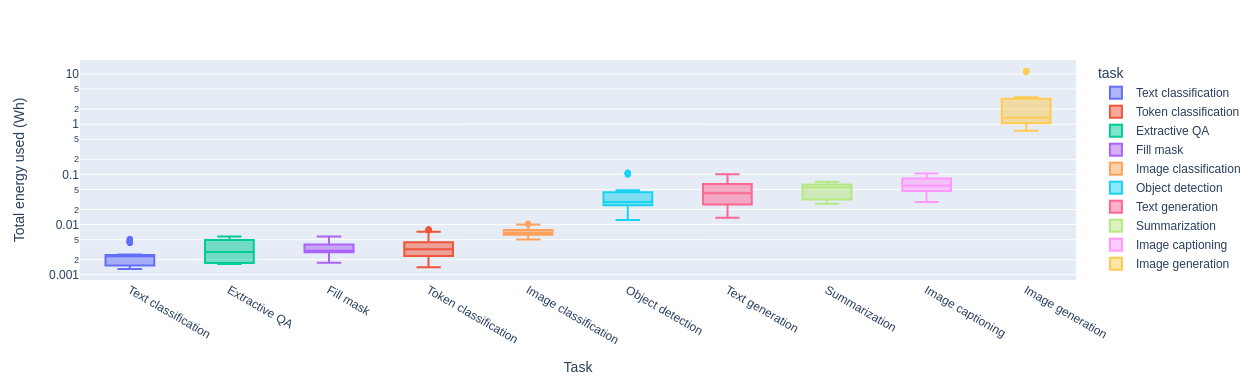

In [116]:
fig = px.box(finetuned_df, x="task", y="query_energy (kWh)", color="task",
             width=1000, height=385, log_y=True)
fig.update_layout(xaxis={'categoryorder':'mean ascending'})
fig.update_layout(yaxis_title='Total energy used (Wh)')
fig.update_layout(xaxis_title='Task')
fig.show()

## Fig 2

In [71]:
text2disc = ['text_classification','token_classification','question_answering']
text2text = ['text_generation','summarization','fill_mask']
im2disc = ['image_classification','object_detection']
im2text = ['image_captioning']
text2im = ['image generation']

In [72]:
def get_multimodality(taskname):
    if taskname in text2disc:
        return 'Text to category'
    elif taskname in text2text:
        return 'Text to text'
    elif taskname in im2disc:
        return 'Image to category'
    elif taskname in im2text:
        return 'Image to text'
    elif taskname in text2im:
        return 'Text to image'

In [76]:
data_df = all_df.groupby(['model','dataset','task']).mean()
data_df = data_df.reset_index()
data_df.head()

/tmp/ipykernel_48887/1093524161.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



model      dataset                  task  \
0  Babelscape/wikineural-multilingual-ner    conll2003  token_classification   
1  Babelscape/wikineural-multilingual-ner       record  token_classification   
2  Babelscape/wikineural-multilingual-ner      wikiann  token_classification   
3           CompVis/stable-diffusion-v1-4  diffusiondb      image generation   
4           CompVis/stable-diffusion-v1-4  imagereward      image generation   

      duration  total emissions (g)  emissions_rate  cpu_power   gpu_power  \
0     9.600376             0.436271        0.000045       42.5  494.869892   
1    13.973915             0.616696        0.000044       42.5  495.426173   
2     9.398267             0.436550        0.000046       42.5  525.397045   
3  4070.177030             0.188882        0.000046       42.5  550.090229   
4  4081.022899             0.183542        0.000045       42.5  509.330007   

   ram_power  cpu_energy  ...  cpu_count  gpu_count  longitude  latitude  \
0  430.77675    0.000148  ...        1.0        8.0  -119.7257   45.8234   
1  430.77675    0.000198  ...        1.0        8.0  -119.7257   45.8234   
2  430.77675    0.000143  ...        1.0        8.0  -119.7257   45.8234   
3  430.77675    0.048219  ...        1.0        8.0  -119.7257   45.8234   
4  430.77675    0.048339  ...        1.0        8.0  -119.7257   45.8234   

   ram_total_size  pue  query emissions (g)  load emissions (g)    num_params  \
0        1148.738  1.0             0.331241                 NaN  1.778534e+08   
1        1148.738  1.0             0.514303                 NaN  1.778534e+08   
2        1148.738  1.0             0.332830                 NaN  1.778534e+08   
3        1148.738  1.0           188.346025                 NaN  1.370217e+09   
4        1148.738  1.0           183.046880                 NaN  1.370217e+09   

   query_energy (kWh)  
0            0.002387  
1            0.003707  
2            0.002399  
3            1.357451  
4            1.319258  

[5 rows x 25 columns]

In [78]:
data_df['modality'] = data_df['task'].apply(lambda x : get_multimodality(x))
data_df['modality'].value_counts()

Text to category     72
Text to text         72
Image to category    48
Text to image        24
Image to text        24
Name: modality, dtype: int64

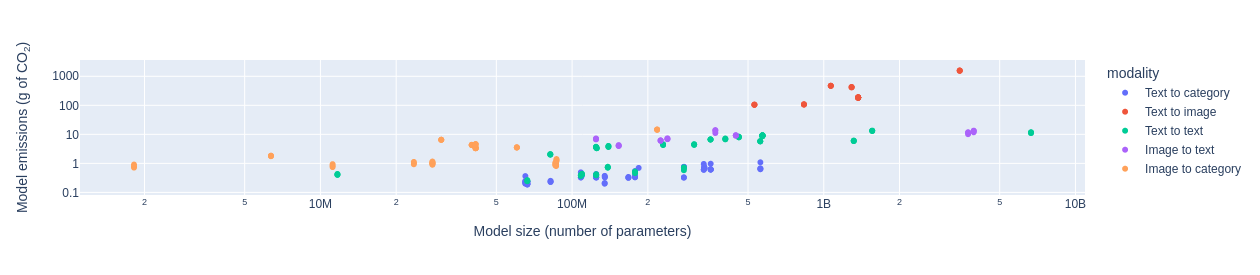

In [79]:
fig = px.scatter(data_df, x="num_params", y="query emissions (g)", color="modality",
             width=800, height=275, log_x=True, log_y=True, custom_data=['model','task'])

fig.update_traces(
    hovertemplate="<br>".join([
        "Model: %{customdata[0]}",
        "Task: %{customdata[1]}",
    ])
)
fig.update_layout(xaxis_title='Model size (number of parameters)')
fig.update_layout(yaxis_title='Model emissions (g of CO<sub>2</sub>)')
fig.show()

**Observations**:
- Discriminative tasks are more energy-efficient than generative tasks, all other things considered
- Text-based tasks are more energy-efficient than image-based tasks
- The two multimodal tasks (text to image and image captioning) are the most energy-intensive tasks
- I'm rerunning summarization to see if the len of the output has an influence on energy efficiency

(update- it does!)

## Fig 3

In [80]:
zeroshot_df = all_df[all_df['task'].str.contains('zero')]
zeroshot_df.head()

timestamp                model  \
20  2023-09-25T14:37:11  google/flan-t5-base   
25  2023-09-25T20:14:24  google/flan-t5-base   
21  2023-09-25T15:44:58  google/flan-t5-base   
27  2023-09-25T22:28:14  google/flan-t5-base   
23  2023-09-25T17:58:17  google/flan-t5-base   

                                  run_id   duration  total emissions (g)  \
20  5d69e75c-8790-494b-b889-9c8b6ec77268  35.045271             1.687180   
25  09d9c5ab-ee9c-42ad-b45b-24227c338d1f  35.057662             1.770781   
21  56d4dbf2-6895-454a-af58-6747ebf9acca  35.095574             1.787652   
27  15ad0c56-ca72-4e46-8fad-5d5498e212ec  35.063635             1.803148   
23  35c06801-a25f-482e-9e78-a05919d49be7  35.322586             1.795563   

    emissions_rate  cpu_power   gpu_power  ram_power  cpu_energy  ...  \
20        0.000048       42.5  463.668152  430.77675    0.000558  ...   
25        0.000051       42.5  536.665100  430.77675    0.000579  ...   
21        0.000051       42.5  489.428690  430.77675    0.000585  ...   
27        0.000051       42.5  535.720547  430.77675    0.000588  ...   
23        0.000051       42.5  501.411232  430.77675    0.000588  ...   

    on_cloud  pue  dataset                         task query emissions (g)  \
20         N  1.0     sst2  zeroshot_sentiment_analysis            1.232956   
25         N  1.0     sst2  zeroshot_sentiment_analysis            1.266906   
21         N  1.0     sst2  zeroshot_sentiment_analysis            1.267984   
27         N  1.0     sst2  zeroshot_sentiment_analysis            1.272158   
23         N  1.0     sst2  zeroshot_sentiment_analysis            1.276314   

   load emissions (g)                     filename  num_params  \
20                NaN  zeroshot_sentiment_sst2.csv   222903552   
25                NaN  zeroshot_sentiment_sst2.csv   222903552   
21                NaN  zeroshot_sentiment_sst2.csv   222903552   
27                NaN  zeroshot_sentiment_sst2.csv   222903552   
23                NaN  zeroshot_sentiment_sst2.csv   222903552   

   query_energy (kWh)  generative  
20           0.008886  generative  
25           0.009131  generative  
21           0.009139  generative  
27           0.009169  generative  
23           0.009199  generative  

[5 rows x 39 columns]

In [81]:
grouzero_df = zeroshot_df.groupby(['model','task','dataset']).mean()
grouzero_df = grouzero_df.reset_index()  
grouzero_df['architecture_type']= grouzero_df.apply(lambda x : encoder_check(x.model),axis=1)
grouzero_df['task']= grouzero_df['task'].str.replace('zeroshot_','').str.replace('sentiment_analysis', 'text_classification')
grouzero_df.head()

/tmp/ipykernel_48887/1201619204.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



model                 task  dataset    duration  \
0  bigscience/bloomz-1b7   question_answering     sciq   71.809682   
1  bigscience/bloomz-1b7   question_answering    squad   98.537451   
2  bigscience/bloomz-1b7   question_answering  squadv2  104.963654   
3  bigscience/bloomz-1b7  text_classification     imdb   80.324729   
4  bigscience/bloomz-1b7  text_classification     sst2   38.023067   

   total emissions (g)  emissions_rate  cpu_power   gpu_power  ram_power  \
0             4.249601        0.000059       42.5  519.062049  430.77675   
1             5.313443        0.000054       42.5  496.577338  430.77675   
2             5.522806        0.000053       42.5  513.420349  430.77675   
3             4.311198        0.000054       42.5  546.641966  430.77675   
4             2.436425        0.000064       42.5  520.234411  430.77675   

   cpu_energy  ...  gpu_count  longitude  latitude  ram_total_size  pue  \
0    0.001271  ...        8.0  -119.7257   45.8234        1148.738  1.0   
1    0.001584  ...        8.0  -119.7257   45.8234        1148.738  1.0   
2    0.001646  ...        8.0  -119.7257   45.8234        1148.738  1.0   
3    0.001257  ...        8.0  -119.7257   45.8234        1148.738  1.0   
4    0.000737  ...        8.0  -119.7257   45.8234        1148.738  1.0   

   query emissions (g)  load emissions (g)    num_params  query_energy (kWh)  \
0             2.958060                 NaN  1.720000e+09            0.021319   
1             4.027421                 NaN  1.720000e+09            0.029026   
2             4.274258                 NaN  1.720000e+09            0.030805   
3             3.326152                 NaN  1.720000e+09            0.023972   
4             1.530334                 NaN  1.720000e+09            0.011029   

   architecture_type  
0   zeroshot_decoder  
1   zeroshot_decoder  
2   zeroshot_decoder  
3   zeroshot_decoder  
4   zeroshot_decoder  

[5 rows x 26 columns]

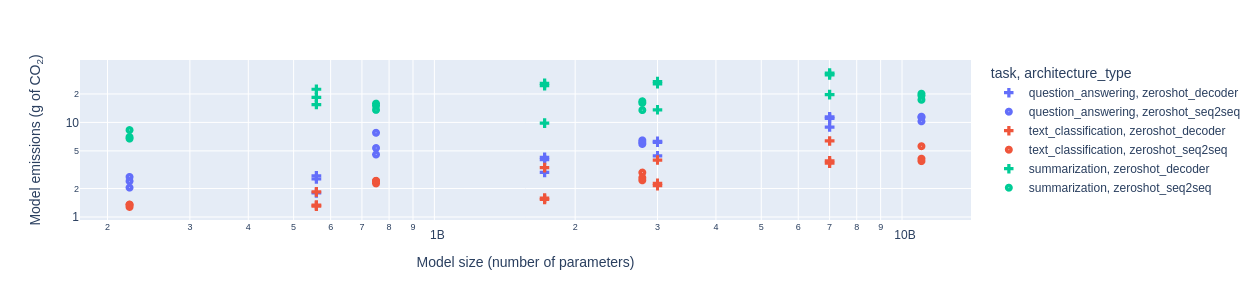

In [82]:
symbols = ['cross', 'circle-dot']
fig = px.scatter(grouzero_df, x="num_params", y="query emissions (g)", color="task", symbol = 'architecture_type',
                 symbol_sequence = symbols, hover_data="dataset",
             width=900, height=300,  log_x=True, log_y=True)
fig.update_traces(marker=dict(size=8))
fig.update_layout(xaxis_title='Model size (number of parameters)')
fig.update_layout(yaxis_title='Model emissions (g of CO<sub>2</sub>)')

fig.show()

## Table 3

In [83]:
modelzero_df = zeroshot_df.groupby(['model']).mean()
modelzero_df = modelzero_df.reset_index()  
modelzero_df['num_params'] = modelzero_df['model'].apply(lambda x : get_model_params(x))
#taskzero_df['task']= taskzero_df['task'].str.replace('zeroshot_','').str.replace('sentiment_analysis', 'text_classification')
modelzero_df= modelzero_df[['model', 'num_params', 'query_energy (kWh)' ,'query emissions (g)',]].sort_values('query emissions (g)')
modelzero_df.head(8)

/tmp/ipykernel_48887/1968139326.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



model   num_params  query_energy (kWh)  \
4     google/flan-t5-base    222903552            0.026519   
2  bigscience/bloomz-560m    559214592            0.054270   
5    google/flan-t5-large    750251008            0.055344   
6       google/flan-t5-xl   2783959040            0.058306   
0   bigscience/bloomz-1b7   1720000000            0.062390   
1    bigscience/bloomz-3b   3000000000            0.073338   
7      google/flan-t5-xxl  11003736064            0.082728   
3   bigscience/bloomz-7b1   7000000000            0.104256   

   query emissions (g)  
4             3.679524  
2             7.529887  
5             7.678947  
6             8.089993  
0             8.656595  
1            10.175611  
7            11.478478  
3            14.465561

## Performance + CO2

In [84]:
grouped_df = grouped_df.drop('task',axis=1)

In [85]:
performance_all = pd.merge(grouped_df, model_performance_df, on='model')
performance_all['type']= performance_all.apply(lambda x : encoder_check(x.model),axis=1)
performance_all.head()

model    duration  \
0                               ainize/bart-base-cnn  104.110166   
1  bert-large-uncased-whole-word-masking-finetune...   18.079869   
2                              bigscience/bloomz-1b7   91.770262   
3                              bigscience/bloomz-1b7   91.770262   
4                              bigscience/bloomz-1b7   91.770262   

   total emissions (g)  emissions_rate  cpu_power   gpu_power  ram_power  \
0             3.997914        0.000038       42.5  492.163344  430.77675   
1             1.300484        0.000072       42.5  495.568398  430.77675   
2             5.028617        0.000055       42.5  509.686579  430.77675   
3             5.028617        0.000055       42.5  509.686579  430.77675   
4             5.028617        0.000055       42.5  509.686579  430.77675   

   cpu_energy  gpu_energy  ram_energy  ...               type  sst2 (acc)  \
0    0.001286    0.014726    0.012802  ...  finetuned_seq2seq         NaN   
1    0.000408    0.004959    0.004006  ...  finetuned_encoder         NaN   
2    0.001500    0.019641    0.015101  ...   zeroshot_decoder      0.9438   
3    0.001500    0.019641    0.015101  ...   zeroshot_decoder         NaN   
4    0.001500    0.019641    0.015101  ...   zeroshot_decoder         NaN   

   imdb (acc)  tomatoes (acc)  sciq (acc)  squad (f1)  \
0         NaN             NaN         NaN         NaN   
1         NaN             NaN      0.4774      0.9300   
2      0.9724          0.9296         NaN         NaN   
3         NaN             NaN         NaN         NaN   
4         NaN             NaN      0.9590      0.5033   

   squad_v2 (f1, has answer)  samsum (rouge)  xsum (rouge)  cnn (rouge)  
0                        NaN        0.270195       0.15911     0.259687  
1                     0.8388             NaN           NaN          NaN  
2                        NaN             NaN           NaN          NaN  
3                        NaN        0.257000       0.15530     0.180300  
4                     0.2480             NaN           NaN          NaN  

[5 rows x 35 columns]

### Sentiment Analysis

In [86]:
sent_df = performance_all[['imdb (acc)','sst2 (acc)','tomatoes (acc)', "query emissions (g)", 'model','type','num_params']][performance_all['task'].isin(['sentiment'])]

In [87]:
sent_df['log_emissions'] = np.log1p(sent_df["query emissions (g)"])
sent_df['log_emissions'].head()

2     1.558828
5     1.146204
8     3.047865
11    1.892560
14    1.336527
Name: log_emissions, dtype: float64

## Fig 5

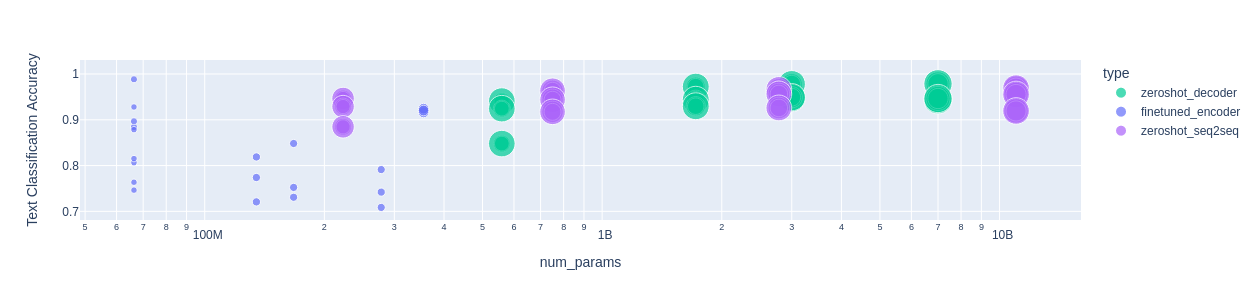

In [88]:
color_discrete_map = {'finetuned_encoder': '#636EFA', 'zeroshot_seq2seq': '#AB63FA', 'zeroshot_decoder': '#00CC96', 'finetuned_seq2seq':'#EF553B'}
fig = px.scatter(sent_df, y=['imdb (acc)', 'sst2 (acc)', 'tomatoes (acc)'], x="num_params", color="type", color_discrete_map=color_discrete_map,
                 size= "log_emissions",   width=800, height=300, log_x=True, hover_data="model")
fig.update_layout(yaxis_title='Text Classification Accuracy')
fig.show()

### Summarization

In [89]:
summ_df = performance_all[['samsum (rouge)', 'xsum (rouge)', 'cnn (rouge)', "query emissions (g)", 'model','type', 'num_params']][performance_all['task'].isin(['summarization'])]

In [90]:
summ_df['log_emissions'] = np.log1p(summ_df["query emissions (g)"])
summ_df['log_emissions'].head()

0     1.572799
3     1.558828
6     1.146204
9     3.047865
12    1.892560
Name: log_emissions, dtype: float64

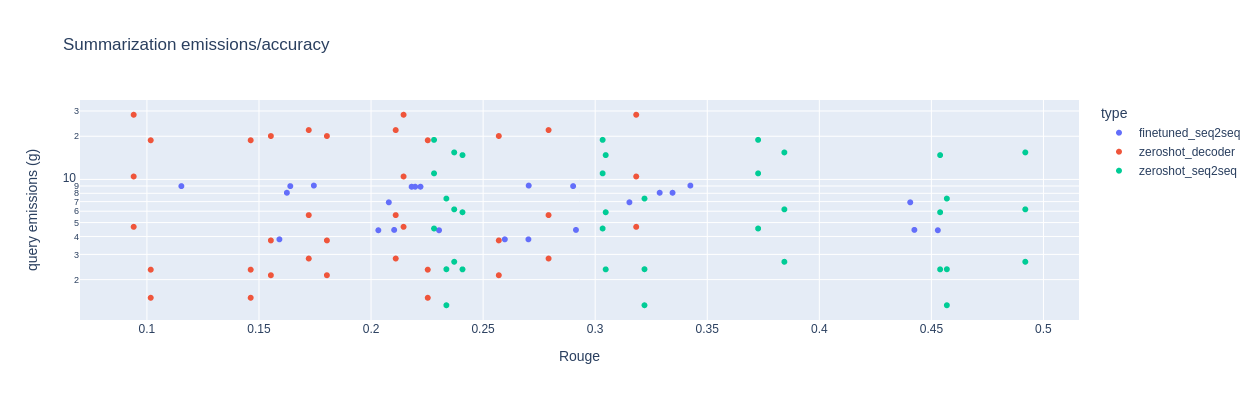

In [91]:
fig = px.scatter(summ_df, x=['samsum (rouge)', 'xsum (rouge)', 'cnn (rouge)'], y="query emissions (g)", color="type", 
            title="Summarization emissions/accuracy", width=800, height=400, log_y=True, hover_data="model")
fig.update_layout(xaxis_title='Rouge')
fig.show()

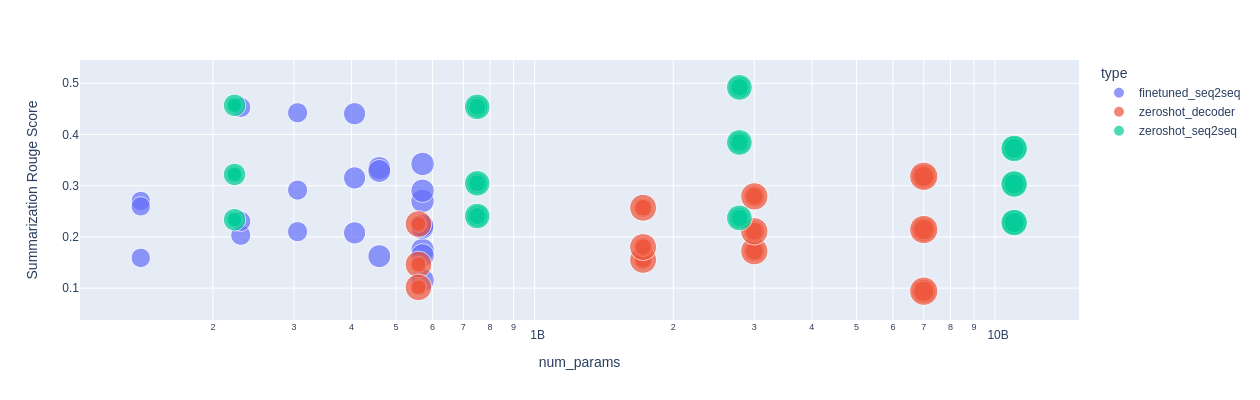

In [92]:
fig = px.scatter(summ_df, y=['samsum (rouge)', 'xsum (rouge)', 'cnn (rouge)'], x="num_params", color="type", 
                 size = 'log_emissions',  width=800, height=400, log_x=True, hover_data="model")
fig.update_layout(yaxis_title='Summarization Rouge Score')
fig.show()

### Question Answering

In [93]:
qa_df = performance_all[['sciq (acc)', 'squad (f1)', 'squad_v2 (f1, has answer)', "query emissions (g)", 'model','type','num_params']][performance_all['task'].isin(['qa'])]

In [94]:
qa_df['log_emissions'] = np.log1p(qa_df["query emissions (g)"])
qa_df['log_emissions'].head()

1     0.532035
4     1.558828
7     1.146204
10    3.047865
13    1.892560
Name: log_emissions, dtype: float64

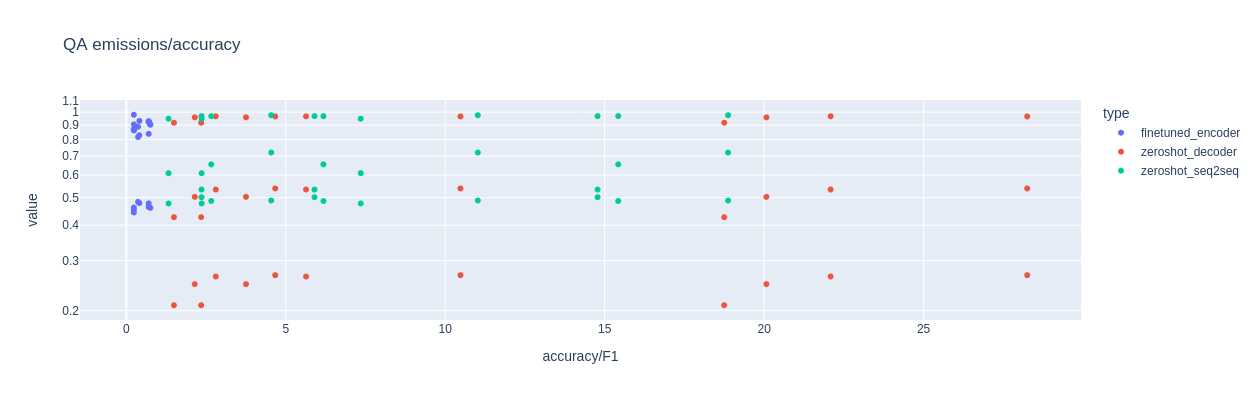

In [95]:
fig = px.scatter(qa_df, y=['sciq (acc)', 'squad (f1)', 'squad_v2 (f1, has answer)'], x="query emissions (g)", color="type", 
             title= "QA emissions/accuracy", width=800, height=400, log_y=True, hover_data="model")
fig.update_layout(xaxis_title='accuracy/F1')
fig.show()

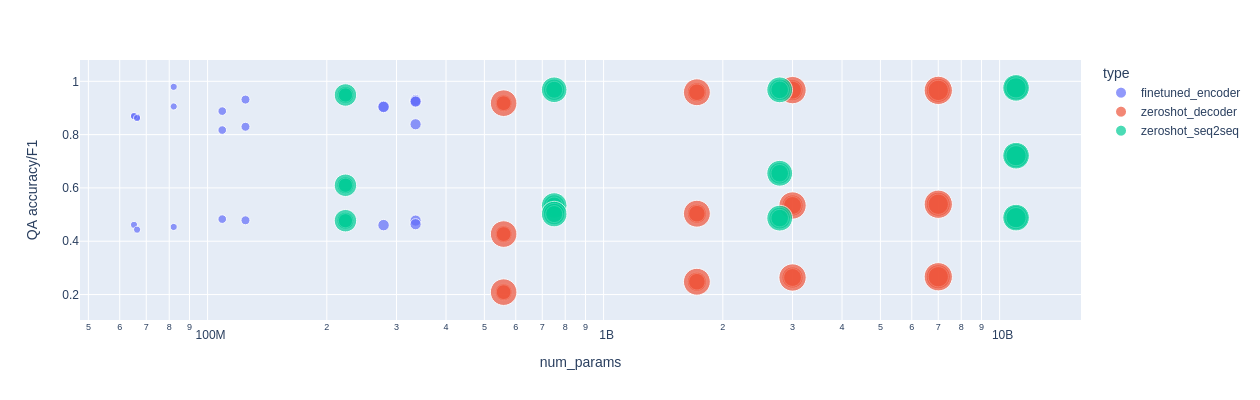

In [96]:
fig = px.scatter(qa_df, y=['sciq (acc)', 'squad (f1)', 'squad_v2 (f1, has answer)'], x="num_params", color="type", 
                 size = 'log_emissions',  width=800, height=400, log_x=True, hover_data="model")
fig.update_layout(yaxis_title='QA accuracy/F1')
fig.show()

## Table 4

In [97]:
len_dir = '../lengths/complete/'

In [98]:
sentiment_bloom_data = ['imdb.csv','rotten_tomatoes.csv','sst2.csv']

dflist=[]
for c in sentiment_bloom_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

sentiment_bloom = pd.concat(dflist, axis=0)
sentiment_bloom.head()

Input  Output                   model dataset
0     59       1  bigscience/bloomz-560m    imdb
1     59       1  bigscience/bloomz-560m    imdb
2     59       1  bigscience/bloomz-560m    imdb
3     59       1  bigscience/bloomz-560m    imdb
4     59       1  bigscience/bloomz-560m    imdb

In [99]:
sentiment_bloom.groupby(['model','dataset']).mean()

Input  Output
model                  dataset                        
bigscience/bloomz-1b   imdb             58.733   2.613
                       rotten_tomatoes  30.077   0.987
                       sst              28.350   0.992
bigscience/bloomz-3b   imdb             58.733   1.716
                       rotten_tomatoes  30.077   1.028
                       sst              28.350   1.014
bigscience/bloomz-560m imdb             58.733   1.643
                       rotten_tomatoes  30.077   0.996
                       sst              28.350   0.978
bigscience/bloomz-7b   imdb             58.733   1.530
                       rotten_tomatoes  30.077   0.995
                       sst              28.350   1.023

In [100]:
sentiment_flan_data = ['imdb_flan.csv','rotten_tomatoes_flan.csv','sst2_flan.csv']

dflist=[]
for c in sentiment_flan_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

sentiment_flan = pd.concat(dflist, axis=0)
sentiment_flan.head()

Input  Output                model dataset
0     59       1  google/flan-t5-base    imdb
1     59       1  google/flan-t5-base    imdb
2     59       1  google/flan-t5-base    imdb
3     59       1  google/flan-t5-base    imdb
4     59       1  google/flan-t5-base    imdb

In [101]:
sentiment_flan.groupby(['model','dataset']).mean()

Input  Output
model                dataset                        
google/flan-t5-base  imdb             58.733   1.000
                     rotten_tomatoes  30.077   1.000
                     sst              28.350   1.000
google/flan-t5-large imdb             58.733   1.000
                     rotten_tomatoes  30.077   1.000
                     sst              28.350   1.000
google/flan-t5-xl    imdb             58.733   1.000
                     rotten_tomatoes  30.077   1.000
                     sst              28.350   1.000
google/flan-t5-xxl   imdb             58.733   1.004
                     rotten_tomatoes  30.077   1.000
                     sst              28.350   1.000

In [102]:
qa_bloom_data = ['sciq.csv','squad.csv','squad2.csv']

dflist=[]
for c in qa_bloom_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

qa_bloom = pd.concat(dflist, axis=0)
qa_bloom.head()

Input  Output                   model dataset
0     68       1  bigscience/bloomz-560m    sciq
1    115       1  bigscience/bloomz-560m    sciq
2     89       1  bigscience/bloomz-560m    sciq
3     86       1  bigscience/bloomz-560m    sciq
4    101       1  bigscience/bloomz-560m    sciq

In [103]:
qa_bloom.groupby(['model','dataset']).mean()

Input  Output
model                  dataset                  
bigscience/bloomz-1b   Squad_2_  115.852   2.538
                       sciq      113.121   1.245
                       squad     133.999   1.960
bigscience/bloomz-3b   Squad_2_  115.852   2.581
                       sciq      113.121   1.100
                       squad     133.999   2.021
bigscience/bloomz-560m Squad_2_  115.852   2.325
                       sciq      113.121   1.278
                       squad     133.999   1.931
bigscience/bloomz-7b   Squad_2_  115.852   2.407
                       sciq      113.121   1.095
                       squad     133.999   1.953

In [104]:
qa_flan_data = ['sciq_flan.csv','squad_flan.csv','squad2_flan.csv']

dflist=[]
for c in qa_flan_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

qa_flan = pd.concat(dflist, axis=0)
qa_flan.head()

Input  Output                model dataset
0     68       1  google/flan-t5-base    sciq
1    115       1  google/flan-t5-base    sciq
2     89       1  google/flan-t5-base    sciq
3     86       1  google/flan-t5-base    sciq
4    101       1  google/flan-t5-base    sciq

In [105]:
qa_flan.groupby(['model','dataset']).mean()

Input  Output
model                dataset                  
google/flan-t5-base  Squad_2_  115.852   2.277
                     sciq      113.121   2.031
                     squad     133.999   2.011
google/flan-t5-large Squad_2_  115.852   2.736
                     sciq      113.121   5.414
                     squad     133.999   2.147
google/flan-t5-xl    Squad_2_  115.852   2.708
                     sciq      113.121   3.124
                     squad     133.999   2.164
google/flan-t5-xxl   Squad_2_  115.852   2.577
                     sciq      113.121   2.423
                     squad     133.999   2.131

In [106]:
summ_bloom_data = ['cnn.csv','samsum.csv','xsum.csv']

dflist=[]
for c in summ_bloom_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

summ_bloom = pd.concat(dflist, axis=0)
summ_bloom.head()

Input  Output                   model dataset
0     54      14  bigscience/bloomz-560m     cnn
1     54      14  bigscience/bloomz-560m     cnn
2     54      11  bigscience/bloomz-560m     cnn
3     54      14  bigscience/bloomz-560m     cnn
4     54      14  bigscience/bloomz-560m     cnn

In [107]:
summ_bloom.groupby(['model','dataset']).mean()

Input  Output
model                  dataset                
bigscience/bloomz-1b   cnn      54.000  11.910
                       samsum   47.815   9.407
                       xsum     53.854  12.218
bigscience/bloomz-3b   cnn      54.000  11.726
                       samsum   47.815   9.754
                       xsum     53.854  11.937
bigscience/bloomz-560m cnn      54.000  12.053
                       samsum   47.815   9.542
                       xsum     53.854  11.530
bigscience/bloomz-7b   cnn      54.000  10.344
                       samsum   47.815   9.848
                       xsum     53.854  11.917

In [108]:
summ_flan_data = ['cnn_flan.csv','samsum_flan.csv','xsum_flan.csv']

dflist=[]
for c in summ_flan_data:
    df =pd.read_csv(len_dir+c)
    dflist.append(df)

summ_flan = pd.concat(dflist, axis=0)
summ_flan.head()

Input  Output                model dataset
0     54      14  google/flan-t5-base     cnn
1     54      17  google/flan-t5-base     cnn
2     54       3  google/flan-t5-base     cnn
3     54       1  google/flan-t5-base     cnn
4     54       9  google/flan-t5-base     cnn

In [109]:
summ_flan.model.value_counts()

google/flan-t5-base     3000
google/flan-t5-large    3000
google/flan-t5-xl       3000
google/flan-t5-xxl      3000
Name: model, dtype: int64

In [110]:
summ_flan.groupby(['model','dataset']).mean()

Input  Output
model                dataset                
google/flan-t5-base  cnn      54.000   8.520
                     samsum   47.815  10.562
                     xsum     53.854  12.950
google/flan-t5-large cnn      54.000  11.337
                     samsum   47.815  11.047
                     xsum     53.854  13.617
google/flan-t5-xl    cnn      54.000  11.340
                     samsum   47.815  10.176
                     xsum     53.854  13.492
google/flan-t5-xxl   cnn      54.000  10.679
                     samsum   47.815  10.572
                     xsum     53.854  13.093

## Getting total carbon info

In [111]:
all_emissions=[]
print(len(os.listdir('../emissions_sept20/base/')))
for fi in os.listdir('../emissions_sept20/base/'):
    d = pd.read_csv('../emissions_sept20/base/' + fi) 
    emissions = d['emissions'].sum()
    all_emissions.append(emissions)
print(str(sum(all_emissions)) + ' kg CO₂/kWh')
print(len(all_emissions))

6465
178.76466751830372 kg CO₂/kWh
6465


In [112]:
all_energy=[]
print(len(os.listdir('../emissions_sept20/base/')))
for fi in os.listdir('../emissions_sept20/base/'):
    d = pd.read_csv('../emissions_sept20/base/' + fi)
    energy = d['gpu_energy'].sum()
    all_energy.append(energy)
print(str(sum(all_energy)) + ' kWh')
print(len(all_energy))

6465
753.8460437196554 kWh
6465
